In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import os.path

import cv2 as cv
import numpy as np
from peeptree.processing import ImageProcessor
from peeptree.model import ImageFeatureExtractor, TreeClassifierSVM

# defining necessary paths
image_extensions = ["jpg", "png"]
trained_clf_path = "/home/one_wizard_boi/Documents/Projects/DJI-tree-detection/peeptree/classifier.pickle"
image_dir = "/home/one_wizard_boi/Documents/Projects/DJI-tree-detection/TrainingData/OriginalImages"

# defining a target image
target_image_name = "20200126_152211.jpg"
target_image_path = os.path.join(image_dir, target_image_name)


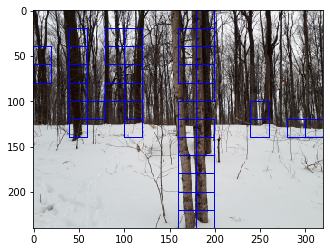

In [2]:
''' Testing the detection pipeline '''

# defining the image processor
processor = ImageProcessor(trained_clf_path, block_size=20)

# loading and processing the target image
image = cv.imread(target_image_path, cv.IMREAD_COLOR)
image = processor.detect_object_segments(image)

# displaying prcessed image
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()

In [3]:
''' Analyzing extracted feature vectors '''

# loading and resizing the target image
image = cv.imread(target_image_path, cv.IMREAD_COLOR)
image = cv.resize(image, (320, 240), interpolation = cv.INTER_AREA)

# defining extraction pipeline
feature_vectors = []
feature_extractor = ImageFeatureExtractor(lbp_radius=10, lbp_n_points=10, fusion_method=2, color_space="RGB",
                                          channel_hist_n_bins = 15)

# defining a tree sgment classifier
clf = TreeClassifierSVM(trained_clf_path)

# going through the blocks of the input image
block_size = 20
n_blocks_row = 240 // 20
n_blocks_col = 320 // 20
for row_i in range(n_blocks_row):
    seg_row_start = row_i * block_size
    for col_i in range(n_blocks_col):

        # extracting current subimage
        seg_col_start = col_i * block_size
        image_seg = image[seg_row_start : seg_row_start + block_size, seg_col_start : seg_col_start + block_size]
        image_seg = np.expand_dims(image_seg, axis=0)
        
        try:
        
            # collecting features for detected segments
            if clf.predict(image_seg) == 1:
                feature_vectors.append(feature_extractor.transform(image_seg)[0])

        except:
            print(image_seg.shape)
            raise
            
                
print(feature_vectors[0])
print(len(feature_vectors[0]))

[0.2775     0.295      0.125      0.06       0.025      0.0275
 0.025      0.035      0.0225     0.0275     0.0375     0.0225
 0.0075     0.005      0.0075     0.20728431 0.20714801 0.2725
 0.205      0.1725     0.0925     0.05       0.0225     0.03
 0.0325     0.0225     0.0275     0.0325     0.02       0.0075
 0.005      0.0075     0.2180098  0.19723878 0.24       0.2025
 0.1675     0.1025     0.0725     0.03       0.03       0.0375
 0.02       0.03       0.0275     0.02       0.0075     0.005
 0.0075     0.24783333 0.18704931 0.2475     0.2525     0.0375
 0.0075     0.0575     0.0675     0.0075     0.0075     0.
 0.0025     0.         0.3125     0.2525     0.2575     0.025
 0.005      0.0575     0.0625     0.0075     0.0025     0.
 0.0025     0.         0.3275     0.2625     0.255      0.025
 0.005      0.055      0.065      0.0025     0.         0.
 0.         0.         0.33      ]
87
